# Telco Customer Churn Rate and Profiling Machine Learning Modelling

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to **7043** customers. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer.  

**Part of CRM Dashboard Project**

![Project Overview](https://raw.githubusercontent.com/ravsssh/TelcoCustomer/refs/heads/main/1.png)

# CRM Dashboard (Work in Progress)

![Dashboard Homepage](https://raw.githubusercontent.com/ravsssh/TelcoCustomer/refs/heads/main/Dashboard%20-%20Homepage.png)

# 📦 Required Modules Installation  
Before running this notebook, ensure all dependencies are installed.

**Recommended:** Use the provided `requirements.txt` for a full environment setup:
```bash
pip install -r requirements.txt

# Modelling

## Load dataset from github repo

In [1]:
import pandas as pd
import numpy as np

# raw csv github link
url = 'https://raw.githubusercontent.com/ravsssh/UAS-Machine-Learning/refs/heads/main/CUSTOMER%20CHURN%20TELCO(in).csv'

df = pd.read_csv(url)

In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##  Create Dummy Location (For Data Visualization Purpose)

In [3]:
import random

provinces = [
    'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kepulauan Riau', 
    'Jambi', 'Sumatera Selatan', 'Bangka Belitung', 'Bengkulu', 'Lampung', 
    'DKI Jakarta', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 
    'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 
    'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara', 'Gorontalo', 
    'Sulawesi Tengah', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tenggara', 
    'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Maluku', 'Maluku Utara', 
    'Papua', 'Papua Barat', 'Papua Tengah', 'Papua Pegunungan', 'Papua Selatan', 
    'Papua Barat Daya'
]

df['province'] = np.random.choice(provinces, size=len(df))

# Pre-processing

## Explanatory Raw Data (Data Types, Unique Value)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Fix incorrect data types

In [6]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check missing values, duplicate rows and class distribution

In [7]:
def check_data_quality(df, target_column='Churn'):

    has_missing_values = df.isnull().values.any()
    missing_counts = df.isnull().sum()
    duplicate_rows = df.duplicated().sum()
    class_distribution = df[target_column].value_counts()
    class_distribution_pct = df[target_column].value_counts(normalize=True)
    
    print("\nIs there missing values:")
    print(has_missing_values)
    if has_missing_values:
        print("\nMissing values by column:")
        print(missing_counts[missing_counts > 0])
    
    print("\nDuplicate Rows:")
    print(duplicate_rows)
    
    print(f"\nClass Distribution ({target_column}):")
    print(class_distribution)
    print(class_distribution_pct)
    
    return {
        'has_missing_values': has_missing_values,
        'missing_counts': missing_counts,
        'duplicate_rows': duplicate_rows,
        'class_distribution': class_distribution,
        'class_distribution_pct': class_distribution_pct
    }

In [8]:
check_data_quality(df)


Is there missing values:
False

Duplicate Rows:
0

Class Distribution (Churn):
Churn
False    5174
True     1869
Name: count, dtype: int64
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64


{'has_missing_values': False,
 'missing_counts': customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 province            0
 dtype: int64,
 'duplicate_rows': 0,
 'class_distribution': Churn
 False    5174
 True     1869
 Name: count, dtype: int64,
 'class_distribution_pct': Churn
 False    0.73463
 True     0.26537
 Name: proportion, dtype: float64}

## Check Unique Value for encoding and domain knowledge

In [9]:
unique_values_counts = df.nunique()
unique_values_counts

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
province              38
dtype: int64

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80


In [11]:
excluded_columns = {
    'customerID', 'province'
}

included_columns = [col for col in df.columns if col not in excluded_columns]

In [12]:
df.drop(columns=excluded_columns, inplace=True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


## Label Encode

In [14]:
# encoding string column
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    unique_values = df[col].nunique()  
    if unique_values == 2: # binary encoding
        df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True) # one hot encoding, multiple string

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,0,0,1,0,0,29.85,29.85,False,...,False,False,False,False,False,False,False,False,True,False
1,1,False,1,0,34,1,1,56.95,1889.50,False,...,False,False,False,False,False,True,False,False,False,True
2,1,False,1,0,2,1,0,53.85,108.15,True,...,False,False,False,False,False,False,False,False,False,True
3,1,False,1,0,45,0,1,42.30,1840.75,False,...,True,False,False,False,False,True,False,False,False,False
4,0,False,1,0,2,1,0,70.70,151.65,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,False,0,1,24,1,0,84.80,1990.50,False,...,True,False,True,False,True,True,False,False,False,True
7039,0,False,0,1,72,1,0,103.20,7362.90,False,...,False,False,True,False,True,True,False,True,False,False
7040,0,False,0,1,11,0,0,29.60,346.45,False,...,False,False,False,False,False,False,False,False,True,False
7041,1,True,0,0,4,1,0,74.40,306.60,True,...,False,False,False,False,False,False,False,False,False,True


In [16]:
# convert boolean true and false to 1 and 0
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

## Check data imbalance

In [17]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [18]:
class_distribution = df['Churn'].value_counts()
class_distribution_pct = df['Churn'].value_counts(normalize=True)    
print(f"\nClass Distribution:")
print(class_distribution)
print(class_distribution_pct)


Class Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## ANN modelling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(sampling_strategy='not minority', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model = Sequential([
    Dense(32, 
          input_shape=(X_train.shape[1],),
          activation='relu',
          kernel_regularizer=l2(0.01)),  
    BatchNormalization(),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
141/141 [==============================] - 1s 2ms/step - loss: 0.9474 - accuracy: 0.6721 - val_loss: 0.7028 - val_accuracy: 0.7657
Epoch 2/50
141/141 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.7602 - val_loss: 0.6334 - val_accuracy: 0.7853
Epoch 3/50
141/141 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7801 - val_loss: 0.5925 - val_accuracy: 0.7888
Epoch 4/50
141/141 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7772 - val_loss: 0.5622 - val_accuracy: 0.7924
Epoch 5/50
141/141 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7890 - val_loss: 0.5407 - val_accuracy: 0.7968
Epoch 6/50
141/141 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7941 - val_loss: 0.5218 - val_accuracy: 0.7941
Epoch 7/50
141/141 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7934 - val_loss: 0.5067 - val_accuracy: 0.7968
Epoch 

## Model evaluation (Confussion Matrix and Learning Curve)

45/45 [==============================] - 0s 656us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



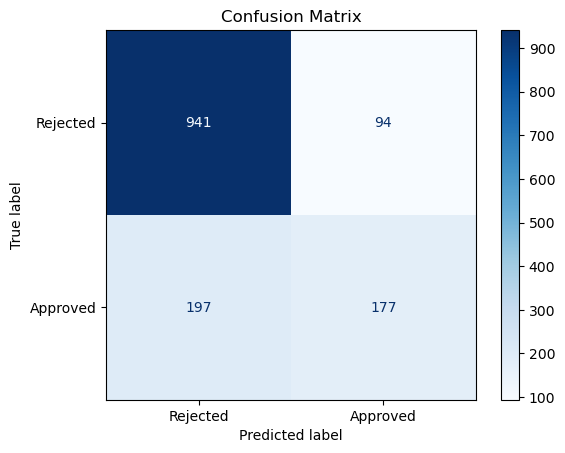

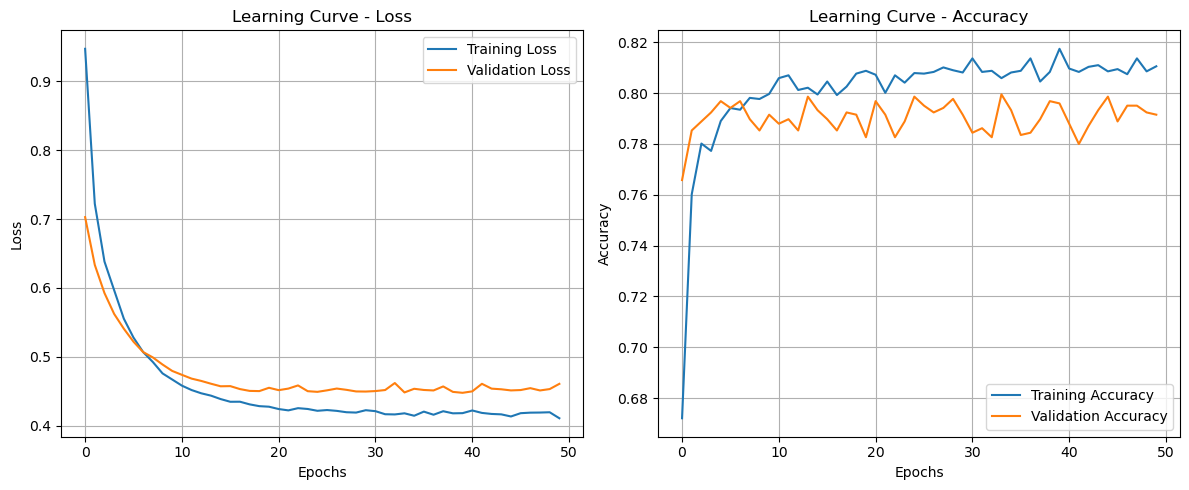

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# implemnet the model to original data

implement_df = pd.read_csv(url)
original_df = implement_df.copy()

# data preprocessing

## datatypes change
implement_df['SeniorCitizen'] = implement_df['SeniorCitizen'].astype(bool)
implement_df['TotalCharges'] = pd.to_numeric(implement_df['TotalCharges'], errors='coerce')
implement_df['TotalCharges'] = implement_df['TotalCharges'].fillna(0)
implement_df['TotalCharges'] = implement_df['TotalCharges'].astype(float)
implement_df['Churn'] = implement_df['Churn'].map({'Yes': True, 'No': False})
implement_df['MonthlyCharges'] = implement_df['MonthlyCharges'].astype(float)
implement_df['tenure'] = implement_df['tenure'].astype(int)

## drop unnecesary column
implement_df = implement_df.drop(columns=['customerID'])

## encoding string column
object_columns = implement_df.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = implement_df[col].nunique()
    if unique_values == 2:
        # Binary encode columns with 2 unique values
        implement_df[col] = implement_df[col].map({implement_df[col].unique()[0]: 0, implement_df[col].unique()[1]: 1})
    else:
        # One-hot encode columns with more than 2 unique values
        implement_df = pd.get_dummies(implement_df, columns=[col], drop_first=True)

## convert boolean to int 1 and 0
implement_df = implement_df.astype({col: 'int' for col in implement_df.select_dtypes(include='bool').columns})

# get the actual features used in training (X columns)
X_columns = X.columns.tolist()

missing_cols = set(X_columns) - set(implement_df.columns)
for col in missing_cols:
    implement_df[col] = 0  # Add missing columns with default value

extra_cols = set(implement_df.columns) - set(X_columns) - {'Churn'}
implement_df = implement_df.drop(columns=extra_cols)

# reorder columns to match training data
implement_features = implement_df.drop(columns=['Churn'])
implement_features = implement_features[X_columns]

# scale the features using the same scaler used during training
implement_features_scaled = scaler.transform(implement_features)

# make predictions using the trained model
predictions_prob = model.predict(implement_features_scaled)
predictions = np.argmax(predictions_prob, axis=1)

# add predictions to the original dataframe
original_df['Churn_Predicted'] = predictions
original_df['Churn_Probability'] = predictions_prob[:, 1]  # Probability of class 1 (churn)

221/221 [==============================] - 0s 582us/step


# Churn Prediction and credit score (probability) result

In [22]:
original_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Predicted,Churn_Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0.672849
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0.039140
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0.297419
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0.051890
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0.658359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,0.180691
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,0.192282
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0.422092
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1,0.759816


## Credits
Segmentation Ilustration : <a href="https://www.vecteezy.com/free-vector/customer-segmentation">Customer Segmentation Vectors by Vecteezy</a>  
Dataset : <a href ="https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data">Dataset From Kaggle</a>

In [23]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   object 
 7   MultipleLines      7043 non-null   object 
 8   InternetService    7043 non-null   object 
 9   OnlineSecurity     7043 non-null   object 
 10  OnlineBackup       7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  TechSupport        7043 non-null   object 
 13  StreamingTV        7043 non-null   object 
 14  StreamingMovies    7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  PaperlessBilling   7043 

In [24]:
original_df.to_csv('customer_churn_predictions.csv', index=False)